In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [245]:
x = np.array([ [0, 1], [1, 0], [1, 1],[0, 0] ])
y = np.array([ [1], [1], [0], [0]])

In [246]:
#Number of nodes in each layer
num_input=2
num_hidden=5
num_output=1

In [247]:
Wxh=np.random.randn(num_input,num_hidden)
# bias_hidden=np.random.rand(1,num_hidden)
bias_hidden=np.zeros((1,num_hidden))


In [248]:
Why=np.random.randn(num_hidden,num_output)
# bias_y=np.random.randn(1,num_output)
bias_y=np.zeros((1,num_output))

In [249]:
Wxh

array([[-0.30604797, -1.29710995, -0.98590211, -0.64938189,  0.02486174],
       [-1.87879299,  1.1474358 , -0.90574271,  0.88342677, -2.6603355 ]])

In [250]:
Wxh.shape

(2, 5)

In [251]:
Why

array([[ 0.47471378],
       [-0.1339538 ],
       [-0.32192054],
       [ 0.21769272],
       [-0.23811709]])

In [252]:
Why.shape

(5, 1)

In [253]:
bias_hidden

array([[0., 0., 0., 0., 0.]])

In [254]:
bias_y

array([[0.]])

In [255]:
def get_sigmoid(z):
    return 1/1+np.exp(-z)

In [256]:
def get_sigmoid_derivative(z):
#     return get_sigmoid(z)*(1-get_sigmoid(z))
        return np.exp(-z)/((1+np.exp(-z))**2)

In [257]:
def feed_forward_network(x,y,Wxh,Why,bias_hidden,bias_y):
#     print(f"Wxh = {Wxh}")
#     print(f"Why = {Why}")
    z1=np.dot(x,Wxh)+bias_hidden
#     print(f"z1 = {z1}")
    a1=get_sigmoid(z1)
#     print(f"a1 = {a1}")
    z2=np.dot(a1,Why)+bias_y
#     print(f"z2 {z2}")
    y_hat=get_sigmoid(z2)
#     print(y_hat)
    return z1,a1,z2,y_hat
    
    

In [258]:
# z1=np.dot(x,Wxh)+bias_hidden

In [259]:
# a1=get_sigmoid(z1)

In [260]:
# a1

In [261]:
# z2=np.dot(a1,Why)+bias_y

In [262]:
# z2

In [263]:
# get_sigmoid(z2)

In [264]:
# get_sigmoid_derivative(z2)

In [265]:
# xp=np.array([[1,2],
#            [2,3],
#            [4,5]])


In [266]:
# 1/xp

In [267]:
def back_prop(z1,a1,z2,y_hat):
    delta2=np.multiply((y-y_hat),get_sigmoid_derivative(z2))
#     print(f"delta2 = {delta2.shape}")
    dJ_Why=np.dot(a1.T,delta2)
#     print(f"dJ_Why = {dJ_Why.shape}")
    delta1=np.dot(delta2,Why.T)*get_sigmoid_derivative(z1)
#     print(f"delta1 = {delta1.shape}")
    dJ_Wxh=np.dot(x.T,delta1)
#     print(f"dJ_Wxh = {dJ_Wxh.shape}")
    return dJ_Wxh,dJ_Why
    

In [268]:
def get_cost(y,y_hat):
    j= 0.5*np.sum((y-y_hat)**2)
#     print(j)
    return j


In [269]:
alpha = 0.01
num_iterations = 5000

In [270]:
Why

array([[ 0.47471378],
       [-0.1339538 ],
       [-0.32192054],
       [ 0.21769272],
       [-0.23811709]])

In [271]:

costs = []
for i in range(num_iterations):
    
    z1,a1,z2,y_hat=feed_forward_network(x,y,Wxh,Why,bias_hidden,bias_y)
#     print(y)
#     print(y_hat)
    
    dJ_Wxh,dJ_Why=back_prop(z1,a1,z2,y_hat)
#     print(f"dJ_Wxh = {dJ_Wxh}")
#     print(f"dJ_Why = {dJ_Why}")
    
    Wxh=Wxh-alpha*dJ_Wxh
    Why=Why-alpha*dJ_Why
    
    costs.append(get_cost(y,y_hat))
    
    if i%100==0:
        print(f" iteration   =  {i}    cost    =  {get_cost(y,y_hat)}")
    
    
    

 iteration   =  0    cost    =  17.148666082455584
 iteration   =  100    cost    =  1.0452687398121556
 iteration   =  200    cost    =  1.0240039395863954
 iteration   =  300    cost    =  1.016297570783896
 iteration   =  400    cost    =  1.0123257721630714
 iteration   =  500    cost    =  1.0099061005476822
 iteration   =  600    cost    =  1.008278463431194
 iteration   =  700    cost    =  1.0071091069621363
 iteration   =  800    cost    =  1.0062285768822088
 iteration   =  900    cost    =  1.0055417395649395
 iteration   =  1000    cost    =  1.0049910808911375
 iteration   =  1100    cost    =  1.0045397921052674
 iteration   =  1200    cost    =  1.004163225660327
 iteration   =  1300    cost    =  1.0038442581192053
 iteration   =  1400    cost    =  1.0035706238247228
 iteration   =  1500    cost    =  1.0033333070300232
 iteration   =  1600    cost    =  1.0031255328130264
 iteration   =  1700    cost    =  1.002942111880275
 iteration   =  1800    cost    =  1.0027790

Text(0, 0.5, 'Cost')

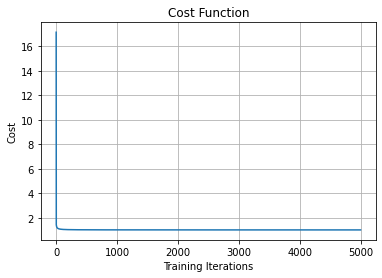

In [272]:
plt.grid()
plt.plot(range(num_iterations),costs)

plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')
